# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Общая-информация" data-toc-modified-id="Общая-информация-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Общая информация</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Обработка-пропусков" data-toc-modified-id="Обработка-пропусков-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Обработка пропусков</a></span></li><li><span><a href="#Изменение-типов-данных" data-toc-modified-id="Изменение-типов-данных-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Изменение типов данных</a></span></li><li><span><a href="#Удаление-дубликатов" data-toc-modified-id="Удаление-дубликатов-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Удаление дубликатов</a></span></li></ul></li><li><span><a href="#Добавление-новых-столбцов" data-toc-modified-id="Добавление-новых-столбцов-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Добавление новых столбцов</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Общая,-жилая-и-площадь-кухни" data-toc-modified-id="Общая,-жилая-и-площадь-кухни-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Общая, жилая и площадь кухни</a></span></li><li><span><a href="#Цена" data-toc-modified-id="Цена-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Цена</a></span></li><li><span><a href="#Количество-комнат" data-toc-modified-id="Количество-комнат-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Количество комнат</a></span></li><li><span><a href="#Высота-потолков" data-toc-modified-id="Высота-потолков-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Высота потолков</a></span></li><li><span><a href="#Этаж-квартиры" data-toc-modified-id="Этаж-квартиры-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Этаж квартиры</a></span></li><li><span><a href="#Тип-этажа-квартиры" data-toc-modified-id="Тип-этажа-квартиры-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Тип этажа квартиры</a></span></li><li><span><a href="#Общее-количество-этажей-в-доме" data-toc-modified-id="Общее-количество-этажей-в-доме-4.7"><span class="toc-item-num">4.7&nbsp;&nbsp;</span>Общее количество этажей в доме</a></span></li><li><span><a href="#Расстояния-до-центра,-аэропорта-и-ближайшего-парка" data-toc-modified-id="Расстояния-до-центра,-аэропорта-и-ближайшего-парка-4.8"><span class="toc-item-num">4.8&nbsp;&nbsp;</span>Расстояния до центра, аэропорта и ближайшего парка</a></span></li><li><span><a href="#День-и-месяц-публикации-объявления" data-toc-modified-id="День-и-месяц-публикации-объявления-4.9"><span class="toc-item-num">4.9&nbsp;&nbsp;</span>День и месяц публикации объявления</a></span></li><li><span><a href="#Скорость-продажи-квартир" data-toc-modified-id="Скорость-продажи-квартир-4.10"><span class="toc-item-num">4.10&nbsp;&nbsp;</span>Скорость продажи квартир</a></span></li><li><span><a href="#Факторы-влияющие-на-стоимость-объекта" data-toc-modified-id="Факторы-влияющие-на-стоимость-объекта-4.11"><span class="toc-item-num">4.11&nbsp;&nbsp;</span>Факторы влияющие на стоимость объекта</a></span></li><li><span><a href="#Средняя-стоимость-квадратного-метра-в-10-населённых-пунктах-с-наибольшим-числом-объявлений" data-toc-modified-id="Средняя-стоимость-квадратного-метра-в-10-населённых-пунктах-с-наибольшим-числом-объявлений-4.12"><span class="toc-item-num">4.12&nbsp;&nbsp;</span>Средняя стоимость квадратного метра в 10 населённых пунктах с наибольшим числом объявлений</a></span></li><li><span><a href="#Зависимость-стоимости-объектов-от-расстояния-до-центра-города" data-toc-modified-id="Зависимость-стоимости-объектов-от-расстояния-до-центра-города-4.13"><span class="toc-item-num">4.13&nbsp;&nbsp;</span>Зависимость стоимости объектов от расстояния до центра города</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

**Описание данных**  
  
Датасет `real_estate_data`

`total_images` — число фотографий квартиры в объявлении  
`last_price` — цена на момент снятия с публикации  
`total_area` — общая площадь квартиры в квадратных метрах (м²)  
`first_day_exposition` — дата публикации  
`rooms` — число комнат  
`ceiling_height` — высота потолков (м)  
`floors_total` — всего этажей в доме  
`living_area` — жилая площадь в квадратных метрах (м²)  
`floor` — этаж  
`is_apartment` — апартаменты (булев тип)  
`studio` — квартира-студия (булев тип)  
`open_plan` — свободная планировка (булев тип)  
`kitchen_area` — площадь кухни в квадратных метрах (м²)  
`balcony` — число балконов  
`locality_name` — название населённого пункта  
`airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)  
`cityCenters_nearest` — расстояние до центра города (м)  
`parks_around3000` — число парков в радиусе 3 км  
`parks_nearest` — расстояние до ближайшего парка (м)  
`ponds_around3000` — число водоёмов в радиусе 3 км  
`ponds_nearest` — расстояние до ближайшего водоёма (м)  
`days_exposition` — сколько дней было размещено объявление (от публикации до снятия)  

### Общая информация

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
try:
    df = pd.read_csv('real_estate_data.csv', sep='\t')
except:
    df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [3]:
pd.set_option('display.max_columns', 50) 
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [5]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Уже можно выделить такие значения как общая площадь 900 м2, 19-комнатная квартира, высоту потолка 100 м, расстояние до аэропорта 0 м

### Предобработка данных

#### Обработка пропусков

In [6]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [7]:
print('Процент пропущенных данных по каждому столбцу')
round((df.isna().sum() / df.isna().count()) * 100, 1)

Процент пропущенных данных по каждому столбцу


total_images             0.0
last_price               0.0
total_area               0.0
first_day_exposition     0.0
rooms                    0.0
ceiling_height          38.8
floors_total             0.4
living_area              8.0
floor                    0.0
is_apartment            88.3
studio                   0.0
open_plan                0.0
kitchen_area             9.6
balcony                 48.6
locality_name            0.2
airports_nearest        23.4
cityCenters_nearest     23.3
parks_around3000        23.3
parks_nearest           65.9
ponds_around3000        23.3
ponds_nearest           61.6
days_exposition         13.4
dtype: float64

Очень много пропущенных значений в столбцах с высотой потолка, наличием балкона и апартаментами. Скорее всего, при публикации объявления эти параметры не являются обязательными к заполнению, и пользователи их просто пропускают.

Пропущенные значения в жилой площади и в площади кухни заполню медианой  
Пропущенные значения в столбце is_apartment заменю на False, т.к. если не указано, что это апартаменты, будем считать, что это не они  
С балконами также, если не указано, сколько балконов, будем считать, что их нет  
Строки, где не указан населенный пункт, можно сразу удалять из расчетов  
Строк, где неизвестно сколько этажей в доме, всего 9, так что тоже можно удалить, от греха подальше  
Пропуски в days_exposition заполню позже, после смены типа данных

In [8]:
df['living_area'] = df['living_area'].fillna(df['living_area'].median())

df['kitchen_area'] = df['kitchen_area'].fillna(df['kitchen_area'].median())

df['is_apartment'] = df['is_apartment'].fillna(False)

df['balcony'] = df['balcony'].fillna(0)

df = df[df['locality_name'].isna() == False]

df = df[df['floors_total'].isna() == False]

Более подробно рассмотрим высоту потолков

In [9]:
df['ceiling_height'].describe()

count    14481.000000
mean         2.771283
std          1.261983
min          1.000000
25%          2.510000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

In [10]:
# Проверяю, сколько всего квартир с высотой потолка 100 м
df[df['ceiling_height'] == 100]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
22869,0,15000000.0,25.0,2018-07-25T00:00:00,1,100.0,5.0,14.0,5,True,False,False,11.0,5.0,Санкт-Петербург,34963.0,8283.0,1.0,223.0,3.0,30.0,19.0


Всего одна квартира с высотой потолка 100м, можно удалить

In [11]:
df = df[(df['ceiling_height'] != 100)]

df['ceiling_height'].describe()

count    14480.000000
mean         2.764568
std          0.969412
min          1.000000
25%          2.510000
50%          2.650000
75%          2.800000
max         32.000000
Name: ceiling_height, dtype: float64

Максимальная высота все еще 32 м, рассмотрим все значения больше 10

In [12]:
df[df['ceiling_height'] > 10]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
355,17,3600000.0,55.2,2018-07-12T00:00:00,2,25.0,5.0,32.0,2,False,False,False,9.1,2.0,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,259.0
3148,14,2900000.0,75.0,2018-11-12T00:00:00,3,32.0,3.0,53.0,2,False,False,False,8.0,0.0,Волхов,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4643,0,4300000.0,45.0,2018-02-01T00:00:00,2,25.0,9.0,30.0,2,False,False,False,7.0,1.0,Санкт-Петербург,12016.0,13256.0,1.0,658.0,1.0,331.0,181.0
4876,7,3000000.0,25.0,2017-09-27T00:00:00,0,27.0,25.0,17.0,17,False,False,True,9.1,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,28.0
5076,0,3850000.0,30.5,2018-10-03T00:00:00,1,24.0,5.0,19.5,1,True,False,False,5.5,0.0,Санкт-Петербург,29686.0,8389.0,3.0,397.0,1.0,578.0,7.0
5246,0,2500000.0,54.0,2017-10-13T00:00:00,2,27.0,5.0,30.0,3,False,False,False,9.0,2.0,деревня Мины,NaN,NaN,NaN,NaN,NaN,NaN,540.0
5669,4,4400000.0,50.0,2017-08-08T00:00:00,2,26.0,9.0,21.3,3,False,False,False,7.0,2.0,Санкт-Петербург,28981.0,10912.0,1.0,305.0,0.0,NaN,267.0
5807,17,8150000.0,80.0,2019-01-09T00:00:00,2,27.0,36.0,41.0,13,False,False,False,12.0,5.0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,38.0
6246,6,3300000.0,44.4,2019-03-25T00:00:00,2,25.0,5.0,31.3,5,False,False,False,5.7,0.0,Кронштадт,68923.0,50649.0,1.0,417.0,2.0,73.0,NaN
9379,5,3950000.0,42.0,2017-03-26T00:00:00,3,25.0,5.0,30.0,2,False,False,False,5.2,0.0,Санкт-Петербург,11647.0,13581.0,0.0,NaN,0.0,NaN,NaN


Считаю, что потолки выше 20м будет разумно разделить на 10, а оставшиеся выше 10м удалить

In [13]:
df['ceiling_height'] = df['ceiling_height'].apply(lambda x: x/10 if x>=20 else x)
df = df[df['ceiling_height'] < 10]
df['ceiling_height'].describe()

count    14478.000000
mean         2.727522
std          0.293072
min          1.000000
25%          2.510000
50%          2.650000
75%          2.800000
max          8.300000
Name: ceiling_height, dtype: float64

Заполню пропуски в высоте потолка медианными значениями

In [14]:
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].median())
df.isna().sum()

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             0
floors_total               0
living_area                0
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area               0
balcony                    0
locality_name              0
airports_nearest        2961
cityCenters_nearest     2941
parks_around3000        2940
parks_nearest           9195
ponds_around3000        2940
ponds_nearest           8764
days_exposition         2450
dtype: int64

**Вывод**  

Пропущенных значений в датафрейме много, в некоторых случаях, процент пропущенных значений достигает почти 90%.  

В столбцах `living_area` и `kitchen_area` менее 10% пропусков, заполнил их медианными занчениями.  

В столбце `is_apartment` максимальное количество пропусков - 88%, заполнил их значениями `False`. Будем считать, что, если характеристика не заполнена, значит объект не является апартаментами.  

В столбце `balcony` почти 48% пропусков, заполнил их значениями `0`. Будем считать, что, если не указано количество балконов, то они отсутсвтуют.

В столбце `locality_name` менее 1% пропусков, эти строки можно сразу удалить, т.к. не имеет смысла рассматривать квартиры, которые неизвестно где находятся.  

В столбце `floors_total` также менее 1% пропусков, удалил эти строки, потому что эти данные нечем заполнить и их очень мало.  

В столбце `days_exposition` 13% пропусков, их я заполню позже, после смены типов данных

Я считаю, что сервису необходимо сделать некоторые поля обязательными к заполнению, чтобы у пользователей не было возможности опубликовать объявление с пропущенными важными характеристиками, а покупатели могли фильтровать интересующие их запросы  

#### Изменение типов данных

Данные в столбцах `last_price`, `balcony`, `floor`, `total_area`, `kitchen_area`, `living_area` и `floors_total` заменяю на `int`, для удобства и экономии памяти  

Столбец `first_day_exposition` меняю на `datetime`  

Пропуски в `days_exposition` заполню разницой между максимальным значением даты в датафрейме и первым днем публикации объявления, т.к. эти объявления скорее всего были еще опубликованы на момент выгрузки данных

In [15]:
df['last_price'] = df['last_price'].astype(int)

df['balcony'] = df['balcony'].astype(int)

df['total_area'] = df['total_area'].astype(int)

df['living_area'] = df['living_area'].astype(int)

df['kitchen_area'] = df['kitchen_area'].astype(int)

df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%d')

df['floor'] = df['floor'].astype(int)

df['floors_total'] = df['floors_total'].astype(int)

most_recent_date = df['first_day_exposition'].max()
df['days_exposition'] = df['days_exposition'].fillna((most_recent_date - df['first_day_exposition']).dt.round('D').dt.days)

df['days_exposition'] = df['days_exposition'].astype(int)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14478 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          14478 non-null  int64         
 1   last_price            14478 non-null  int32         
 2   total_area            14478 non-null  int32         
 3   first_day_exposition  14478 non-null  datetime64[ns]
 4   rooms                 14478 non-null  int64         
 5   ceiling_height        14478 non-null  float64       
 6   floors_total          14478 non-null  int32         
 7   living_area           14478 non-null  int32         
 8   floor                 14478 non-null  int32         
 9   is_apartment          14478 non-null  bool          
 10  studio                14478 non-null  bool          
 11  open_plan             14478 non-null  bool          
 12  kitchen_area          14478 non-null  int32         
 13  balcony         

**Вывод**  

В столбцах `last_price`, `balcony`, `total_area`, `living_area`, `kitchen_area`, `floor` и `floors_total` изменил формат на Int, для удобства и экономии используемой памяти.  

В столбце `first_day_exposition` формат изменил на datetime, и заполнил пропуски в столбце `days_exposition` количеством дней от первого дня публикации до максимального значения даты в датафрейме. Скорее всего, в этот день данные были выгружены, а объявления были еще опубликованы

#### Удаление дубликатов

In [17]:
df.duplicated().sum()

0

Явных дубликатов нет

In [18]:
df['locality_name'].unique().tolist()

['Санкт-Петербург',
 'Петергоф',
 'посёлок Парголово',
 'деревня Кудрово',
 'Пушкин',
 'поселок городского типа Красный Бор',
 'посёлок Мурино',
 'Сертолово',
 'Гатчина',
 'поселок Мурино',
 'Ломоносов',
 'деревня Фёдоровское',
 'Выборг',
 'Кронштадт',
 'Колпино',
 'Кировск',
 'деревня Новое Девяткино',
 'посёлок городского типа Сиверский',
 'садовое товарищество Новая Ропша',
 'Павловск',
 'Всеволожск',
 'Волхов',
 'Кингисепп',
 'Приозерск',
 'Сестрорецк',
 'поселок городского типа Кузьмоловский',
 'деревня Куттузи',
 'поселок Торковичи',
 'посёлок Шушары',
 'поселок Первомайское',
 'Красное Село',
 'посёлок Понтонный',
 'деревня Старая',
 'деревня Лесколово',
 'посёлок Новый Свет',
 'село Путилово',
 'Ивангород',
 'Сланцы',
 'Шлиссельбург',
 'Никольское',
 'Зеленогорск',
 'Сосновый Бор',
 'деревня Оржицы',
 'деревня Кальтино',
 'Кудрово',
 'поселок городского типа Рощино',
 'Сясьстрой',
 'Кириши',
 'Луга',
 'Волосово',
 'поселок Оредеж',
 'посёлок городского типа Красный Бор',
 'посе

Слово "посёлок" везде написано по-разному, приведу все названия к нижнему регистру и заменю все 'ё' на 'е'

In [19]:
len(df['locality_name'].unique())

283

In [20]:
df['locality_name'] = df['locality_name'].str.lower()
df['locality_name'] = df['locality_name'].str.replace('ё', 'е')
len(df['locality_name'].unique())

258

In [21]:
df.duplicated().sum()

0

**Вывод**  

Явных дублкатов в датафрейме не оказалось, но были неявные в столбце `locality_name`, все значения привел к единому стилю и заменил 'ё' на 'е', избавился от 25 дубликатов

Я считаю, что сервису необходимо подтянуть общую базу с названиями населенных пунктов в одном стиле, чтобы не возникало дублей и лучше работали фильтры для покупателей

### Добавление новых столбцов

In [22]:
# Расчет стоимости одного кв. метра
df['price_per_m2'] = round(df['last_price'] / df['total_area'], 0)
df.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_m2
0,20,13000000,108,2019-03-07,3,2.70,16,51,8,False,False,False,25,0,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,57,120370.0
4,2,10000000,100,2018-06-19,2,3.03,14,32,13,False,False,False,41,0,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121,100000.0
9,18,5400000,61,2017-02-26,3,2.50,9,43,7,False,False,False,6,2,санкт-петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289,88525.0
10,5,5050000,39,2017-11-16,1,2.67,12,20,3,False,False,False,8,0,санкт-петербург,38357.0,13878.0,1.0,310.0,2.0,553.0,137,129487.0
13,20,3550000,42,2017-07-01,2,2.56,5,27,5,False,False,False,5,1,петергоф,37868.0,33058.0,1.0,294.0,3.0,298.0,366,84524.0


In [23]:
# Добавление столбца с днем недели
df['weekday'] = pd.DatetimeIndex(df['first_day_exposition']).weekday
df.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_m2,weekday
0,20,13000000,108,2019-03-07,3,2.70,16,51,8,False,False,False,25,0,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,57,120370.0,3
4,2,10000000,100,2018-06-19,2,3.03,14,32,13,False,False,False,41,0,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121,100000.0,1
9,18,5400000,61,2017-02-26,3,2.50,9,43,7,False,False,False,6,2,санкт-петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289,88525.0,6
10,5,5050000,39,2017-11-16,1,2.67,12,20,3,False,False,False,8,0,санкт-петербург,38357.0,13878.0,1.0,310.0,2.0,553.0,137,129487.0,3
13,20,3550000,42,2017-07-01,2,2.56,5,27,5,False,False,False,5,1,петергоф,37868.0,33058.0,1.0,294.0,3.0,298.0,366,84524.0,5


In [24]:
# Добавление столбца с месяцем
df['month'] = pd.DatetimeIndex(df['first_day_exposition']).month
df.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_m2,weekday,month
0,20,13000000,108,2019-03-07,3,2.70,16,51,8,False,False,False,25,0,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,57,120370.0,3,3
4,2,10000000,100,2018-06-19,2,3.03,14,32,13,False,False,False,41,0,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121,100000.0,1,6
9,18,5400000,61,2017-02-26,3,2.50,9,43,7,False,False,False,6,2,санкт-петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289,88525.0,6,2
10,5,5050000,39,2017-11-16,1,2.67,12,20,3,False,False,False,8,0,санкт-петербург,38357.0,13878.0,1.0,310.0,2.0,553.0,137,129487.0,3,11
13,20,3550000,42,2017-07-01,2,2.56,5,27,5,False,False,False,5,1,петергоф,37868.0,33058.0,1.0,294.0,3.0,298.0,366,84524.0,5,7


In [25]:
# Добавление столбца с годом
df['year'] = pd.DatetimeIndex(df['first_day_exposition']).year
df.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_m2,weekday,month,year
0,20,13000000,108,2019-03-07,3,2.70,16,51,8,False,False,False,25,0,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,57,120370.0,3,3,2019
4,2,10000000,100,2018-06-19,2,3.03,14,32,13,False,False,False,41,0,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121,100000.0,1,6,2018
9,18,5400000,61,2017-02-26,3,2.50,9,43,7,False,False,False,6,2,санкт-петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289,88525.0,6,2,2017
10,5,5050000,39,2017-11-16,1,2.67,12,20,3,False,False,False,8,0,санкт-петербург,38357.0,13878.0,1.0,310.0,2.0,553.0,137,129487.0,3,11,2017
13,20,3550000,42,2017-07-01,2,2.56,5,27,5,False,False,False,5,1,петергоф,37868.0,33058.0,1.0,294.0,3.0,298.0,366,84524.0,5,7,2017


In [26]:
# создание функции для определения типа этажа
def floor_type(row):
    if row['floor'] == 1:
        return 'первый'
    if row['floor'] == row['floors_total']:
        return 'последний'
    return 'другой'


In [27]:
# создание столбца с типом этажа
df['floor_type'] = df[['floor', 'floors_total']].apply(floor_type, axis=1)
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_m2,weekday,month,year,floor_type
0,20,13000000,108,2019-03-07,3,2.70,16,51,8,False,False,False,25,0,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,57,120370.0,3,3,2019,другой
4,2,10000000,100,2018-06-19,2,3.03,14,32,13,False,False,False,41,0,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121,100000.0,1,6,2018,другой
9,18,5400000,61,2017-02-26,3,2.50,9,43,7,False,False,False,6,2,санкт-петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289,88525.0,6,2,2017,другой
10,5,5050000,39,2017-11-16,1,2.67,12,20,3,False,False,False,8,0,санкт-петербург,38357.0,13878.0,1.0,310.0,2.0,553.0,137,129487.0,3,11,2017,другой
13,20,3550000,42,2017-07-01,2,2.56,5,27,5,False,False,False,5,1,петергоф,37868.0,33058.0,1.0,294.0,3.0,298.0,366,84524.0,5,7,2017,последний
16,11,6700000,82,2017-11-23,3,3.05,5,55,1,False,False,False,9,0,санкт-петербург,22108.0,10698.0,3.0,420.0,0.0,NaN,397,81707.0,3,11,2017,первый
18,8,3250000,31,2017-01-27,1,2.50,5,19,2,False,False,False,5,1,санкт-петербург,44060.0,10842.0,1.0,759.0,0.0,NaN,168,104839.0,4,1,2017,другой
19,16,14200000,121,2019-01-09,3,2.75,16,76,8,False,False,False,12,0,санкт-петербург,38900.0,12843.0,0.0,NaN,0.0,NaN,97,117355.0,2,1,2019,другой
20,12,6120000,80,2017-09-28,3,2.70,27,48,11,False,False,False,12,2,поселок парголово,53134.0,19311.0,0.0,NaN,0.0,NaN,74,76500.0,3,9,2017,другой
22,20,5000000,58,2017-04-24,2,2.75,25,30,15,False,False,False,11,2,деревня кудрово,NaN,NaN,NaN,NaN,NaN,NaN,60,86207.0,0,4,2017,другой


In [28]:
# создание столбца с расстоянием до центра в км
df['distance_to_center_km'] = round(df['cityCenters_nearest'].apply(lambda x: x/1000), 0)
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_m2,weekday,month,year,floor_type,distance_to_center_km
0,20,13000000,108,2019-03-07,3,2.70,16,51,8,False,False,False,25,0,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,57,120370.0,3,3,2019,другой,16.0
4,2,10000000,100,2018-06-19,2,3.03,14,32,13,False,False,False,41,0,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121,100000.0,1,6,2018,другой,8.0
9,18,5400000,61,2017-02-26,3,2.50,9,43,7,False,False,False,6,2,санкт-петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289,88525.0,6,2,2017,другой,15.0
10,5,5050000,39,2017-11-16,1,2.67,12,20,3,False,False,False,8,0,санкт-петербург,38357.0,13878.0,1.0,310.0,2.0,553.0,137,129487.0,3,11,2017,другой,14.0
13,20,3550000,42,2017-07-01,2,2.56,5,27,5,False,False,False,5,1,петергоф,37868.0,33058.0,1.0,294.0,3.0,298.0,366,84524.0,5,7,2017,последний,33.0
16,11,6700000,82,2017-11-23,3,3.05,5,55,1,False,False,False,9,0,санкт-петербург,22108.0,10698.0,3.0,420.0,0.0,NaN,397,81707.0,3,11,2017,первый,11.0
18,8,3250000,31,2017-01-27,1,2.50,5,19,2,False,False,False,5,1,санкт-петербург,44060.0,10842.0,1.0,759.0,0.0,NaN,168,104839.0,4,1,2017,другой,11.0
19,16,14200000,121,2019-01-09,3,2.75,16,76,8,False,False,False,12,0,санкт-петербург,38900.0,12843.0,0.0,NaN,0.0,NaN,97,117355.0,2,1,2019,другой,13.0
20,12,6120000,80,2017-09-28,3,2.70,27,48,11,False,False,False,12,2,поселок парголово,53134.0,19311.0,0.0,NaN,0.0,NaN,74,76500.0,3,9,2017,другой,19.0
22,20,5000000,58,2017-04-24,2,2.75,25,30,15,False,False,False,11,2,деревня кудрово,NaN,NaN,NaN,NaN,NaN,NaN,60,86207.0,0,4,2017,другой,NaN


**Вывод**  

Добавил в датафрейм новые столбцы:  
- `price_per_m2` - стоимость одного квадратного метра,  
- `weekday` - день недели, в который опубликованно объявление,  
- `month` - месяц публикации объявления,  
- `year` - год публикации объявления,  
- `floor_type` - тип этажа: "первый", "последний" и "другой",  
- `distance_to_center_km` - расстояние до центра города в километрах

### Исследовательский анализ данных

#### Общая, жилая и площадь кухни

In [29]:
df[['total_area', 'living_area', 'kitchen_area']].describe()

,total_area,living_area,kitchen_area
count,14478.000000,14478.000000,14478.000000
mean,61.641456,35.124603,10.223581
std,37.017484,22.260853,5.874474
min,12.000000,2.000000,1.000000
25%,41.000000,20.000000,7.000000
50%,53.000000,30.000000,9.000000
75%,71.000000,42.000000,11.000000
max,900.000000,409.000000,112.000000


Проверим условие, что сумма жилой площади и площади кухни не превышают общую площадь  
Выведу те объявления, где условие не выполняется, их можно сразу удалить из анализа, т.к. информация некорректна

In [30]:
df[(df['kitchen_area'] + df['living_area']) > df['total_area']][['total_area', 'kitchen_area', 'living_area']]

,total_area,kitchen_area,living_area
184,30,6,26
304,32,9,30
546,25,9,30
551,31,9,30
601,53,7,48
...,...,...,...
23326,30,8,30
23380,31,9,30
23530,30,9,30
23534,39,10,30


In [31]:
df = df[(df['kitchen_area'] + df['living_area']) <= df['total_area']]

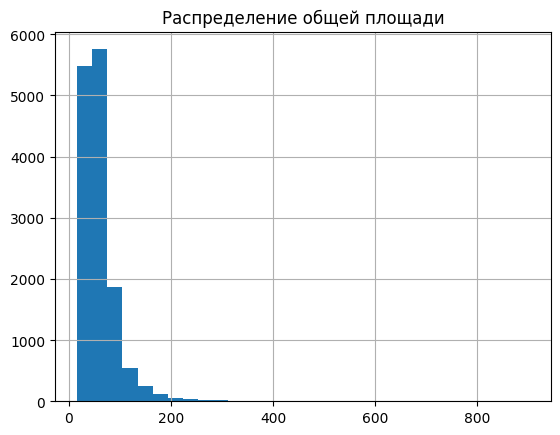

In [32]:
df['total_area'].hist(bins=30)
plt.title('Распределение общей площади')
None

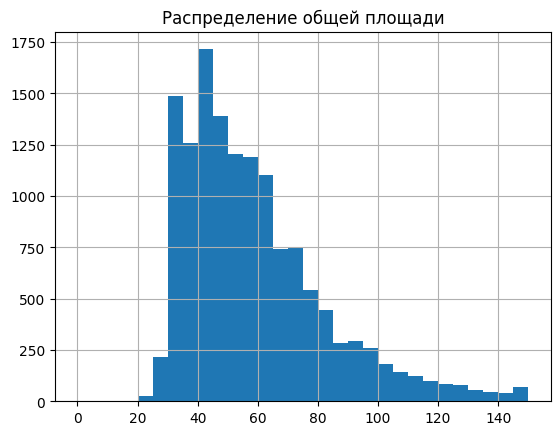

In [33]:
df[df['total_area'] > 300] # всего 38 квратир с площадью более 300 квадратов, можно убрать из расчетов
df = df[df['total_area'] < 300]
df['total_area'].hist(bins=30, range=(0,150))
plt.title('Распределение общей площади')
None

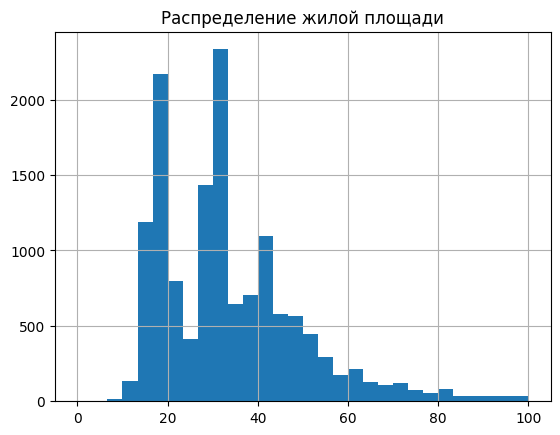

In [34]:
df['living_area'].hist(bins=30, range=(0,100))
plt.title('Распределение жилой площади')
None

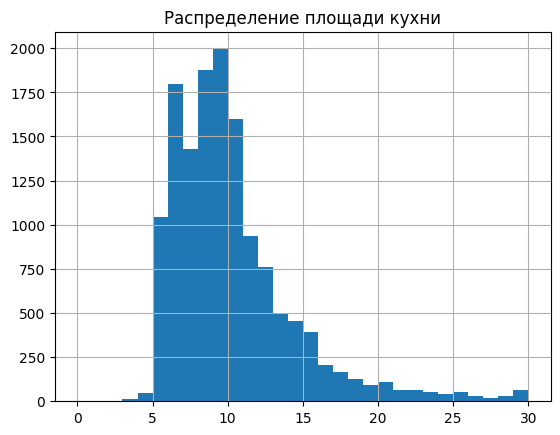

In [35]:
df['kitchen_area'].hist(bins=30, range=(0,30))
plt.title('Распределение площади кухни')
None

**Вывод**  

- Общая площадь
 - Значение общей площади в прредставленных квартирах в основном около 40 м2
- Жилая площадь
 - Значение жилой площади имеет ярко выраженные пики около 20 и 30 м2
- Площадь кухни
 - Значение площади кухни в основном от 5 до 10 м2

#### Цена

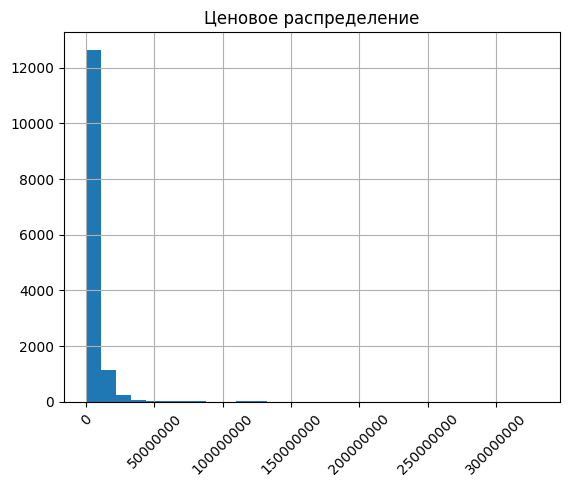

In [36]:
df['last_price'].hist(bins=30)
plt.ticklabel_format(style='plain')
plt.xticks(rotation=45)
plt.title('Ценовое распределение')
None

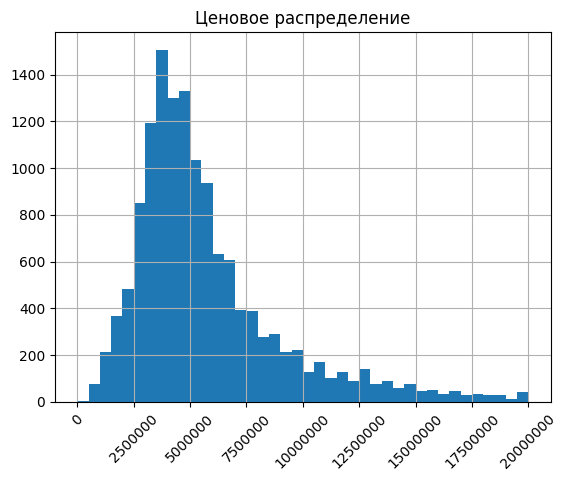

In [37]:
df['last_price'].hist(bins=40, range=(0, 20_000_000))
plt.ticklabel_format(style='plain')
plt.xticks(rotation=45)
plt.title('Ценовое распределение')
None

**Вывод**  

На графике видно, что стоимость большинства представленных квартир лежит в интервале 2.5 - 7.5 млн рублей

#### Количество комнат

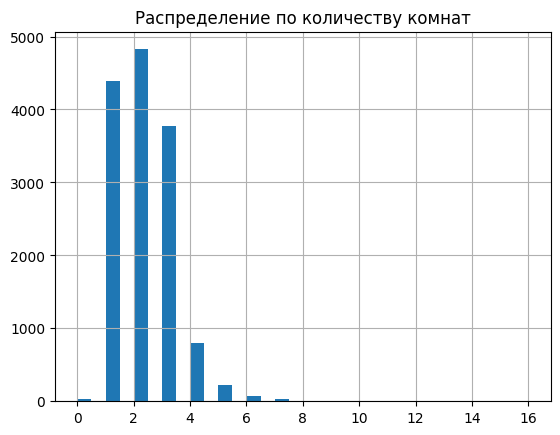

In [38]:
df['rooms'].hist(bins=32)
plt.title('Распределение по количеству комнат')
None

**Вывод**  

В большей части объявлений представлены одно-, двух- и трехкомнатные квартиры

#### Высота потолков

Text(0.5, 1.0, 'Распределение высоты потолков')

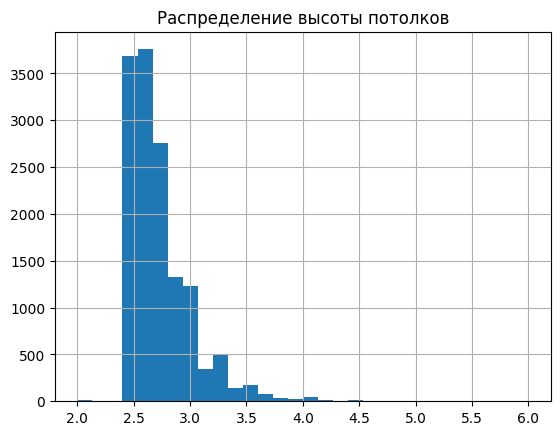

In [39]:
df['ceiling_height'].hist(bins=30, range=(2,6))
plt.title('Распределение высоты потолков')

**Вывод**  

В большей части объявлений представлены квартиры с высотой потолка 2.5 - 3.5 м

#### Этаж квартиры

Text(0.5, 1.0, 'Распределение по этажам')

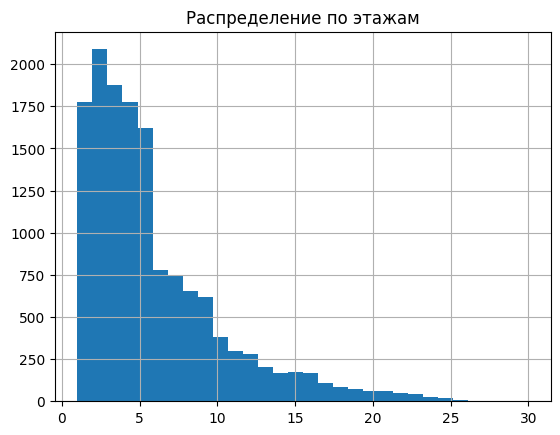

In [40]:
df['floor'].hist(bins=30)
plt.title('Распределение по этажам')

**Вывод**  

В большей части объявлений представлены квартиры, расположенные до 10 этажа

#### Тип этажа квартиры

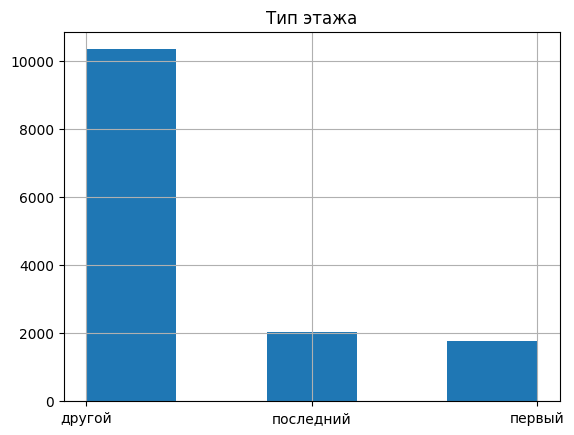

In [41]:
df['floor_type'].hist(bins=5)
plt.title('Тип этажа')
None

**Вывод**  

Большинство представленных квартир расположены не на крайних этажах, меньше всего квартир на первом этаже

#### Общее количество этажей в доме

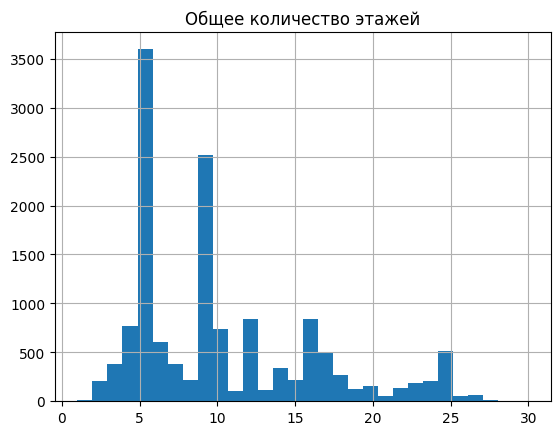

In [42]:
df['floors_total'].hist(bins=30, range=(1,30))
plt.title('Общее количество этажей')
None

**Вывод**  

Распределение неравномерное, но есть пики на 5 и 9, что говорит о том, что в пятиэтажных и девятиэтажных домах представлена немалая часть квартир

#### Расстояния до центра, аэропорта и ближайшего парка

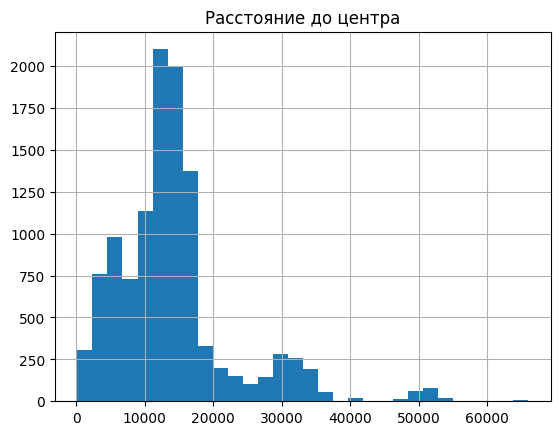

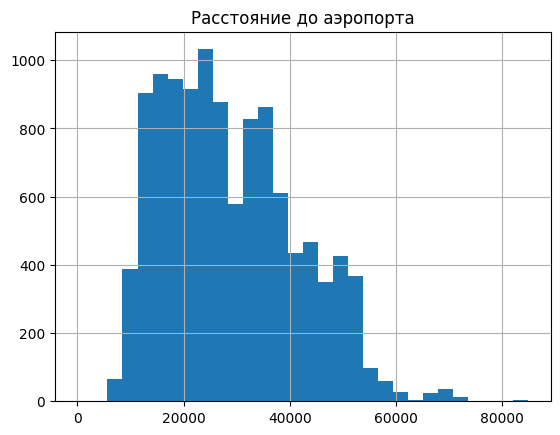

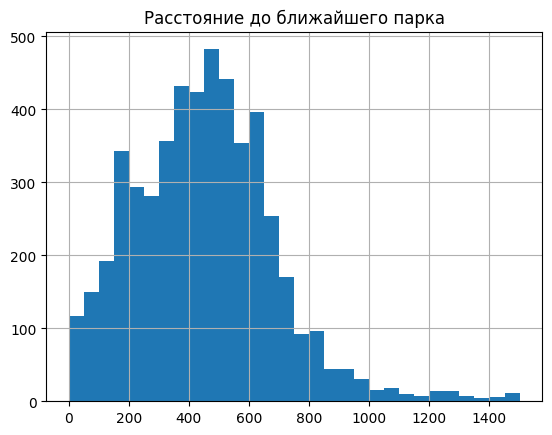

In [43]:
df['cityCenters_nearest'].hist(bins=30)
plt.title('Расстояние до центра')
plt.show()
df['airports_nearest'].hist(bins=30)
plt.title('Расстояние до аэропорта')
plt.show()
df['parks_nearest'].hist(bins=30, range=(0,1500))
plt.title('Расстояние до ближайшего парка')
plt.show()

**Вывод**  

- Большинство представленных квартир расположено в 10-15км от центра города.  
- Большая часть представленных квартир расположены в 10-50 км от аэропорта 
- У большинства представленных квартир в радиусе 1 км есть парк

#### День и месяц публикации объявления

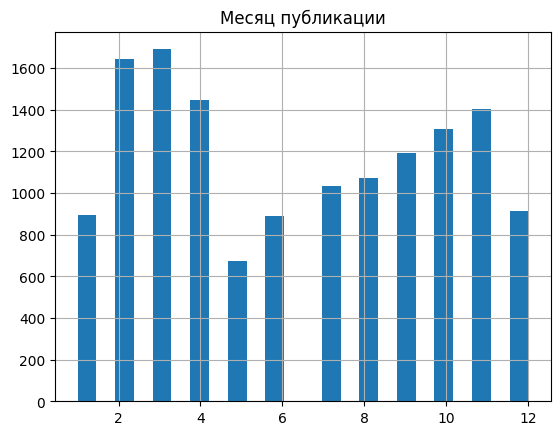

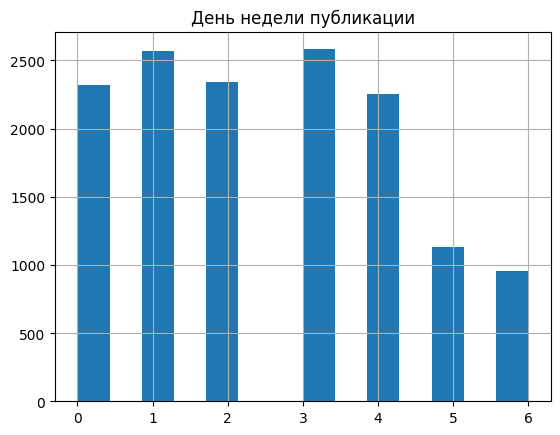

In [44]:
df['month'].hist(bins=24, range=(1,12))
plt.title('Месяц публикации')
plt.show()
df['weekday'].hist(bins=14, range=(0,6))
plt.title('День недели публикации')
None

**Вывод**  

- Чаще всего объявления публикуют в феврале, марте и апреле, самые низкие показатели в мае  
- В будние дни разницы пркатически нет, но по выходным публикаций почти в 2 раза меньше

#### Скорость продажи квартир

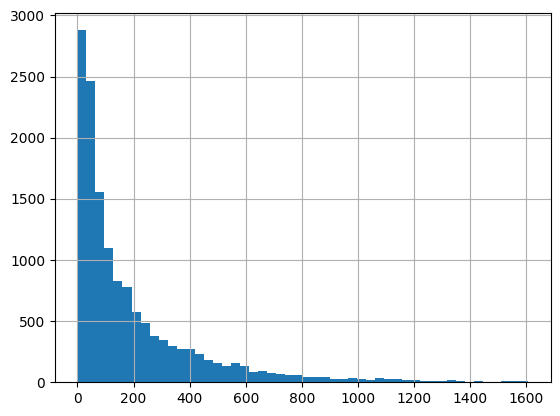

In [45]:
df['days_exposition'].hist(bins=50)
None

Большая часть квартир продается в первые 200 дней. Рассмотрим ближе этот отрезок

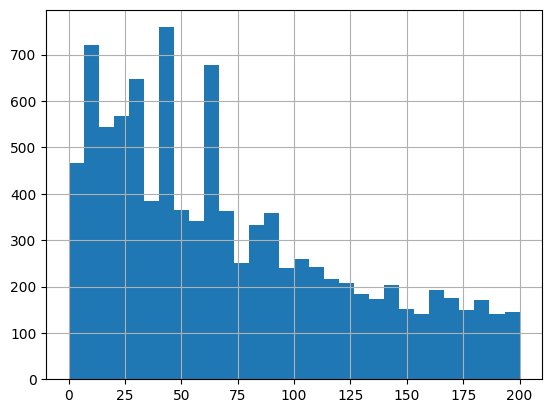

In [46]:
df['days_exposition'].hist(bins=30, range=(0,200))
plt.show()
# есть непонятные пики в районе 10, 25, 50 и 60 дней, выведу отдельно участки с этими значениями

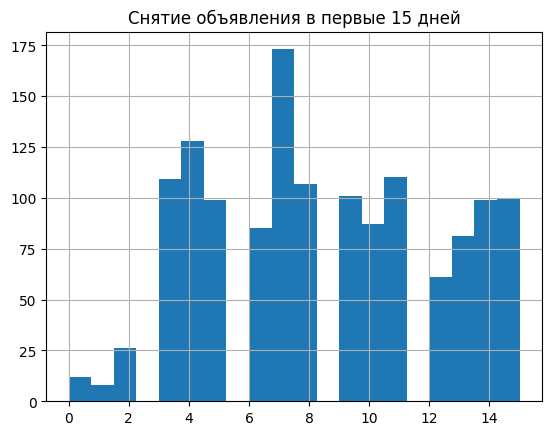

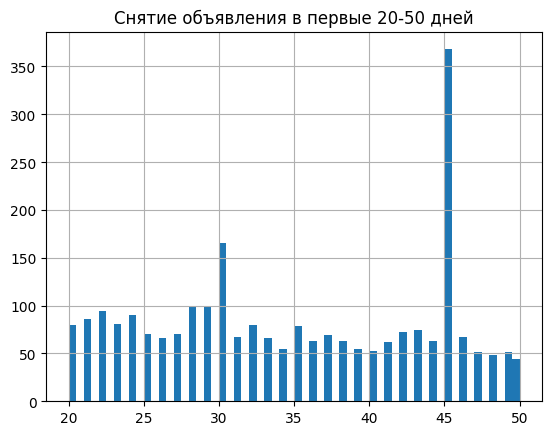

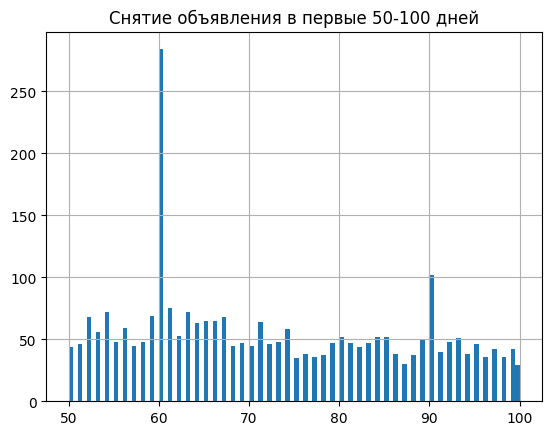

In [47]:
df['days_exposition'].hist(bins=20, range=(0,15))
plt.title('Снятие объявления в первые 15 дней')
plt.show()
df['days_exposition'].hist(bins=60, range=(20,50))
plt.title('Снятие объявления в первые 20-50 дней')
plt.show()
df['days_exposition'].hist(bins=100, range=(50,100))
plt.title('Снятие объявления в первые 50-100 дней')
plt.show()

Видно выраженные пики на 7, 30, 45, 60 и 90 днях. Это связано с политикой размещения на площадке.  
Яндекс.Недвижимость автоматически удаляет объявления спустя определенное время, в зависимости от стоимости. Эти значения можно удалить

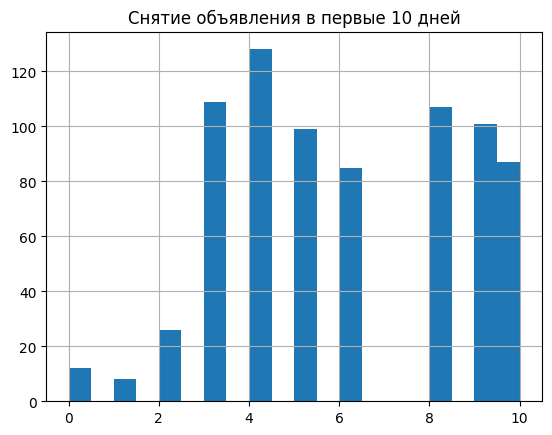

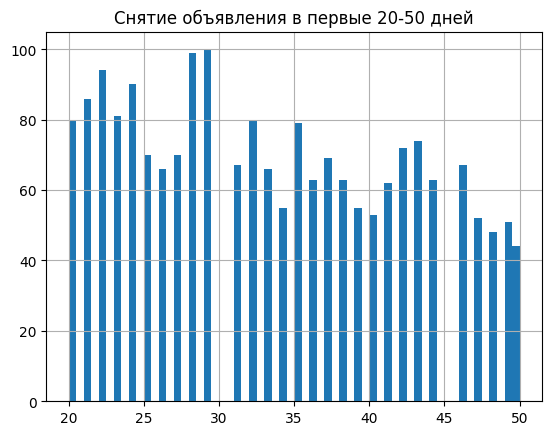

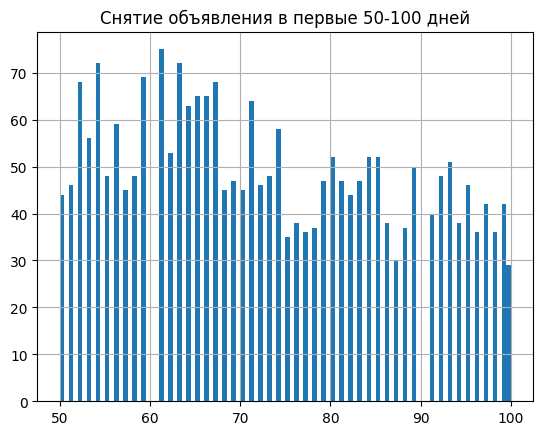

In [48]:
df = df[(df['days_exposition'] != 7) & (df['days_exposition'] != 30) & (df['days_exposition'] != 45) \
        & (df['days_exposition'] != 60) & (df['days_exposition'] != 90)]

df['days_exposition'].hist(bins=20, range=(0,10))
plt.title('Снятие объявления в первые 10 дней')
plt.show()

df['days_exposition'].hist(bins=60, range=(20,50))
plt.title('Снятие объявления в первые 20-50 дней')
plt.show()

df['days_exposition'].hist(bins=100, range=(50,100))
plt.title('Снятие объявления в первые 50-100 дней')
plt.show()

Посмотрим на зависимость скорости продажи от стоимости квартиры. </br> Для удобства поделим квартиры на группы в зависимости от стоимости: до 10 млн, 10-25 млн, 25-100 млн и более 100 млн

In [49]:
def price_grouped(row):
    price = row['last_price']
    
    if price <= 10_000_000:
        return '0-10 млн'
    if 10_000_000 < price <= 25_000_000:
        return '10-25 млн'
    if 25_000_000 < price <= 100_000_000:
        return '25-100 млн'
    return 'более 100 млн'
df['price_grouped'] = df.apply(price_grouped, axis=1)
df[['last_price','price_grouped']].sample(7)

,last_price,price_grouped
3652,6800000,0-10 млн
3534,2750000,0-10 млн
17950,2700000,0-10 млн
2770,10335000,10-25 млн
19361,4300000,0-10 млн
13309,6650000,0-10 млн
8217,2400000,0-10 млн


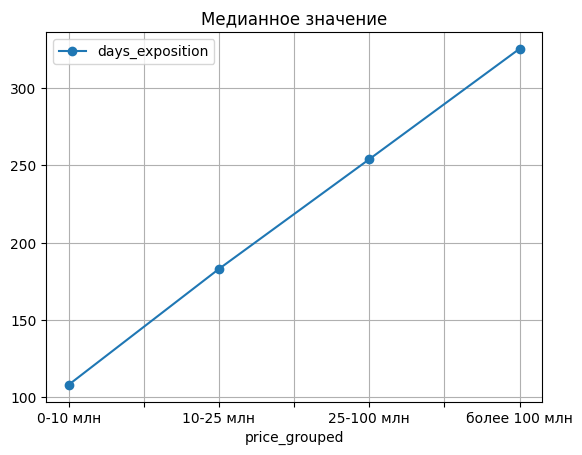

Text(0.5, 1.0, 'Среднее значение')

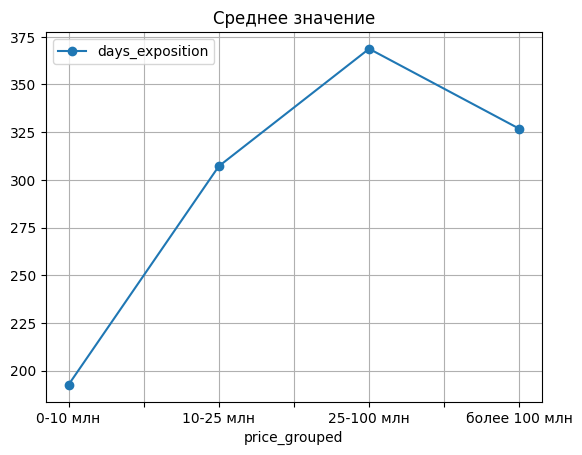

In [50]:
df.pivot_table(index='price_grouped', values='days_exposition', aggfunc='median').plot(style='o-', grid=True)
plt.title('Медианное значение')
plt.show()
df.pivot_table(index='price_grouped', values='days_exposition', aggfunc='mean').plot(style='o-', grid=True)
plt.title('Среднее значение')

Видна прямая зависимость скорости продажи квартиры от ее стоимости

In [51]:
sns.set_style('whitegrid')

<AxesSubplot:xlabel='price_grouped', ylabel='days_exposition'>

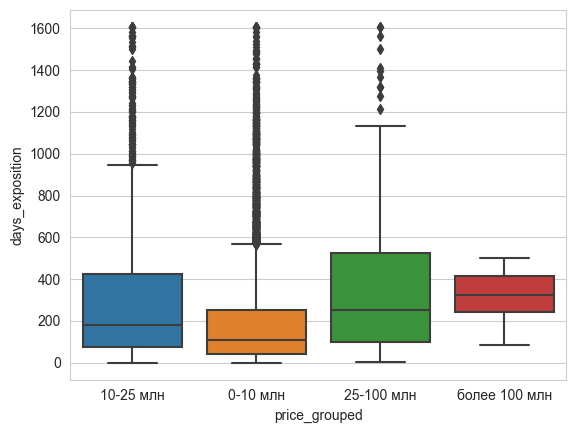

In [52]:
sns.boxplot(data=df, x='price_grouped', y='days_exposition')

In [53]:
print('Квартиры до 10 млн:','\n', '\n', df.query('price_grouped == "0-10 млн"')['days_exposition'].describe())
print()
print('Квартиры от 10 до 25 млн:','\n', '\n', df.query('price_grouped == "10-25 млн"')['days_exposition'].describe())
print()
print('Квартиры от 25 до 100 млн:','\n', '\n', df.query('price_grouped == "25-100 млн"')['days_exposition'].describe())
print()
print('Квартиры от 100 млн:','\n', '\n', df.query('price_grouped == "более 100 млн"')['days_exposition'].describe())

Квартиры до 10 млн: 
 
 count    11375.000000
mean       192.539341
std        229.685516
min          0.000000
25%         41.000000
50%        108.000000
75%        252.000000
max       1606.000000
Name: days_exposition, dtype: float64

Квартиры от 10 до 25 млн: 
 
 count    1428.000000
mean      307.153361
std       326.296903
min         0.000000
25%        74.000000
50%       183.000000
75%       425.500000
max      1606.000000
Name: days_exposition, dtype: float64

Квартиры от 25 до 100 млн: 
 
 count     246.000000
mean      368.727642
std       353.840035
min         2.000000
25%        98.250000
50%       254.000000
75%       525.500000
max      1607.000000
Name: days_exposition, dtype: float64

Квартиры от 100 млн: 
 
 count     12.000000
mean     326.750000
std      125.989989
min       85.000000
25%      245.000000
50%      325.500000
75%      416.000000
max      501.000000
Name: days_exposition, dtype: float64


**Вывод**  

- *Объявления до 10 млн*  
  
  - Обычно продажа занимает около 100 дней
  - Быстрыми являются продажи в первые 40 дней
  - Необычно долгими являются продажи более чем через 600 дней  
- *Объявления от 10 до 20 млн*  
  
  - Обычно продажа занимает около 180 дней
  - Быстрыми являются продажи в первые 75 дней
  - Необычно долгими являются продажи более чем через 900 дней  
- *Объявления от 25 до 100 млн*  
  
  - Обычно продажа занимает около 250 дней
  - Быстрыми являются продажи в первые 80 дней
  - Необычно долгими являются продажи более чем через 1100 дней  
- *Объявления от 100 млн*  
   ***В этом ценовом диапазоне представлено всего 12 объявлений, так что данные могут быть некорректными***
  - Обычно продажа занимает около 300 дней
  - Быстрыми являются продажи в первые 200 дней,
  - Необычно долгими являются продажи более чем через 500 дней 

#### Факторы влияющие на стоимость объекта

Коэффициент корреляции: 0.6861402244906509 



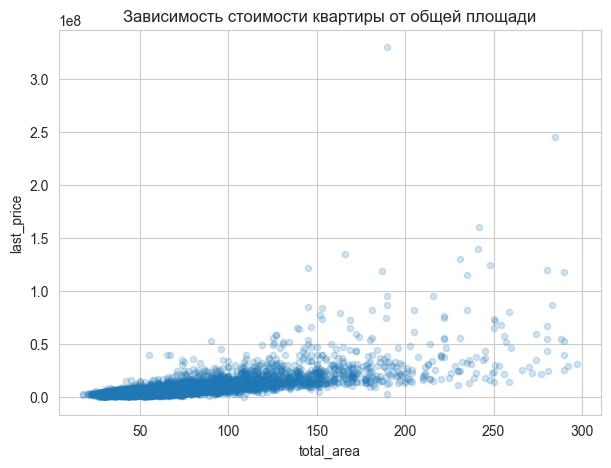

In [54]:
print('Коэффициент корреляции:', df['total_area'].corr(df['last_price']), '\n')
df.plot(x='total_area', y='last_price', kind='scatter', alpha=0.2, figsize=(7,5))
plt.title('Зависимость стоимости квартиры от общей площади')
None

Коэффициент корреляции 0.69 говорит о наличии достаточно сильной связи между значениями общей площади квартиры и ее стоимостью

Коэффициент корреляции: 0.5746823603463365 



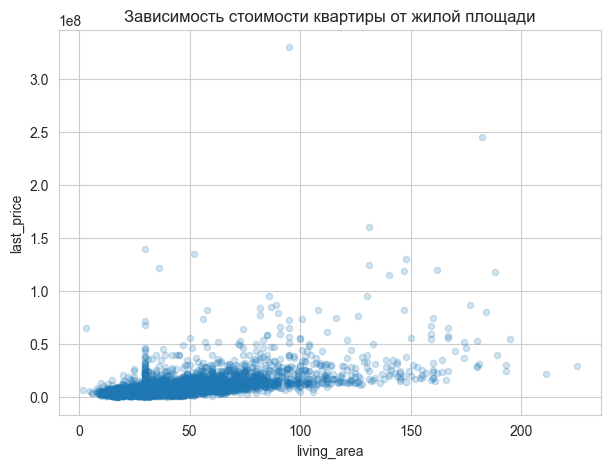

In [55]:
print('Коэффициент корреляции:', df['living_area'].corr(df['last_price']), '\n')
df.plot(x='living_area', y='last_price', kind='scatter', alpha=0.2,figsize=(7,5))
plt.title('Зависимость стоимости квартиры от жилой площади')
None

От жилой площади зависимость уже слабее, но зависимость все равно наблюдается

Коэффициент корреляции: 0.5147355281440944 



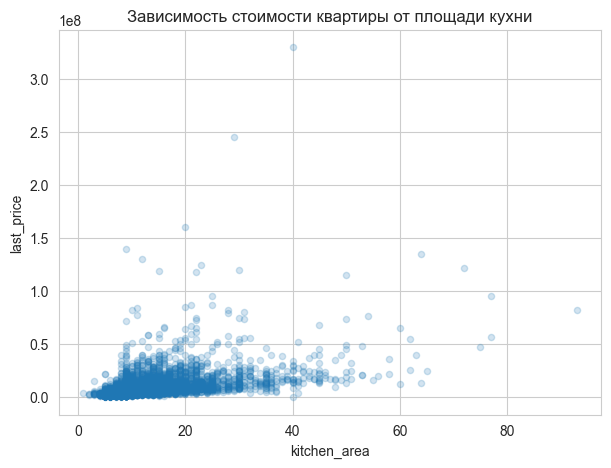

In [56]:
print('Коэффициент корреляции:', df['kitchen_area'].corr(df['last_price']), '\n')
df.plot(x='kitchen_area', y='last_price', kind='scatter', alpha=0.2, figsize=(7,5))
plt.title('Зависимость стоимости квартиры от площади кухни')
None

От площади кухни зависимость самая слабая, коэффициент корреляции всего 0.51

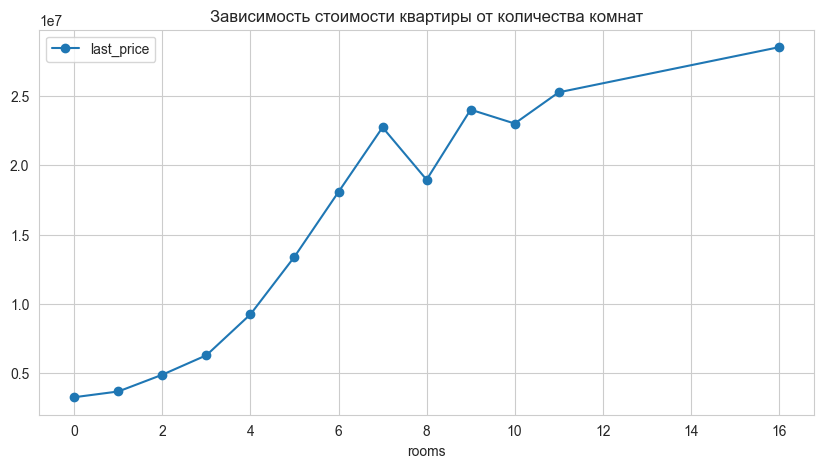

In [57]:
df.pivot_table(index='rooms', values='last_price', aggfunc='median').plot(grid='true', style='o-', figsize=(10,5))
plt.title('Зависимость стоимости квартиры от количества комнат')
None

Из графика видно, что медианная стоимость квартир увеличивется в зависимости от количества комнат

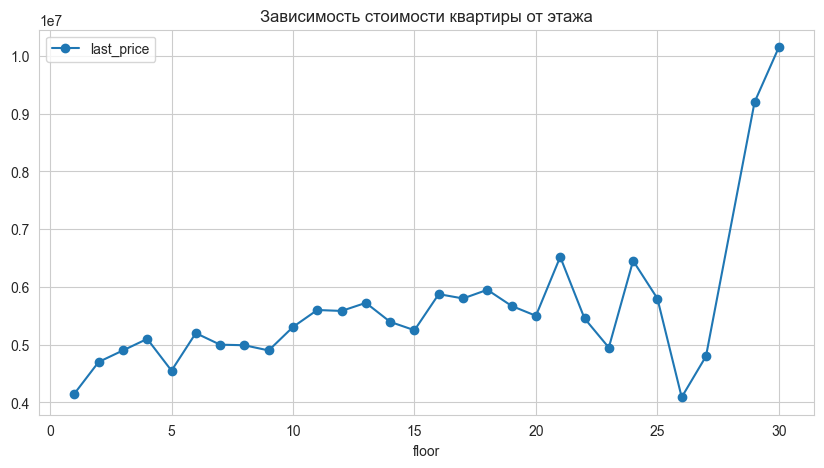

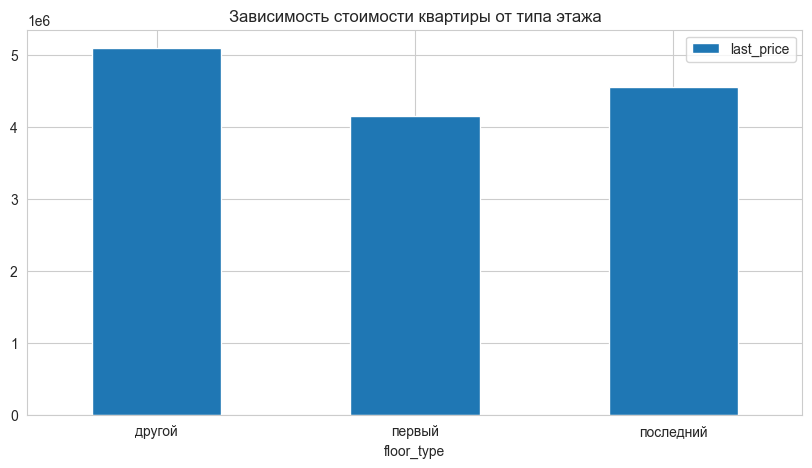

In [58]:
df.pivot_table(index='floor', values='last_price', aggfunc='median').plot(grid='true', style='o-', figsize=(10,5))
plt.title('Зависимость стоимости квартиры от этажа')
plt.show()
df.pivot_table(index='floor_type', values='last_price', aggfunc='median').plot(grid='true', kind='bar', figsize=(10,5))
plt.xticks(rotation=0)
plt.title('Зависимость стоимости квартиры от типа этажа')
None

На первом графике видно, что стоимость квартир увеличивается, вместе с высотой этажа, но квартиры на первом и последнем этажах дешевле, чем на других.

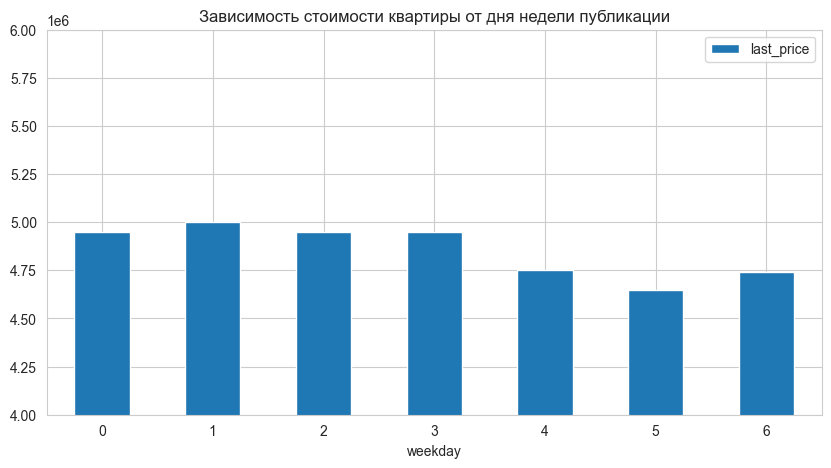

In [59]:
df.pivot_table(index='weekday', values='last_price', aggfunc='median').plot(grid='true', kind='bar',figsize=(10,5))
plt.ylim(4e6,6e6)
plt.xticks(rotation=0)
plt.title('Зависимость стоимости квартиры от дня недели публикации')
None

День недели публикации объявления практически не влияет на стоимость квартиры, объявления опубликованные в пятницу и на выходных, немного дешевле остальных

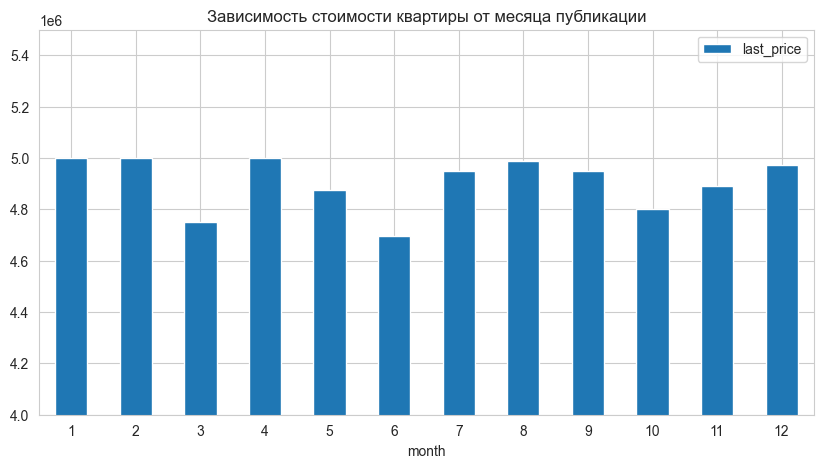

In [60]:
df.pivot_table(index='month', values='last_price', aggfunc='median').plot(grid='true', kind='bar', figsize=(10,5))
plt.ylim(4e6,5.5e6)
plt.title('Зависимость стоимости квартиры от месяца публикации')
plt.xticks(rotation=0)
None

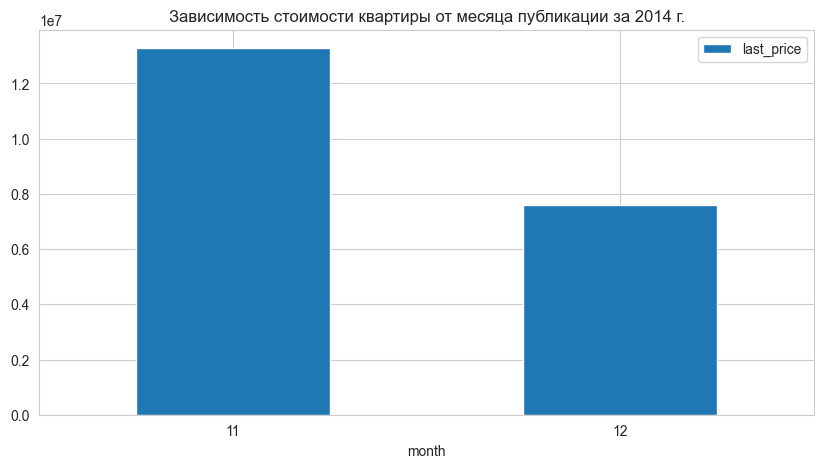

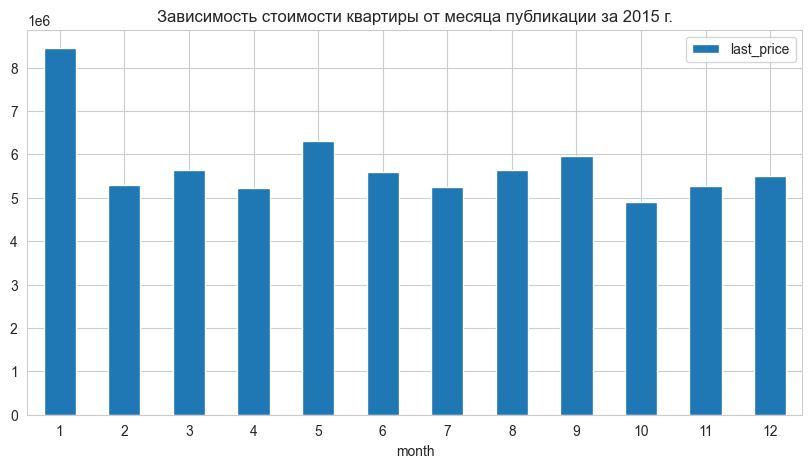

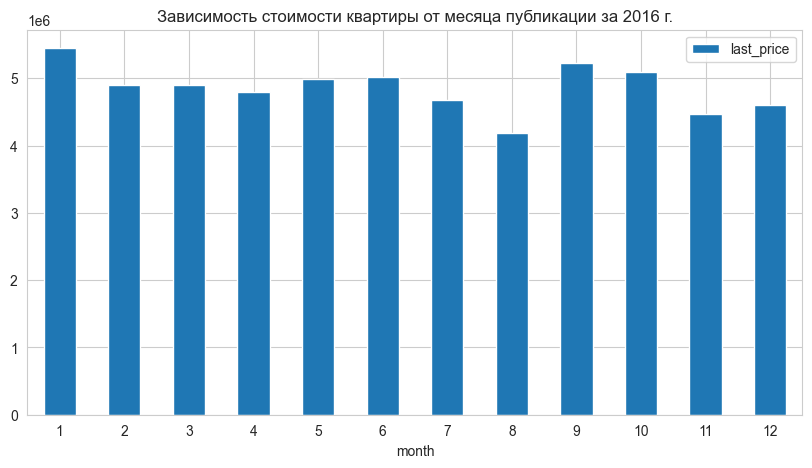

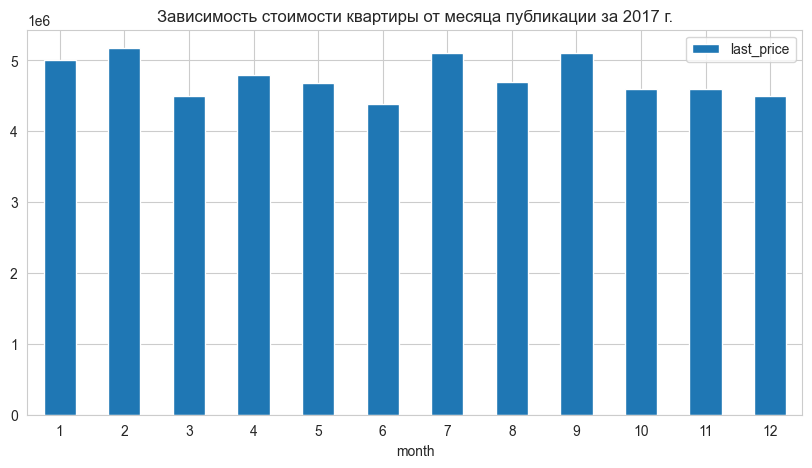

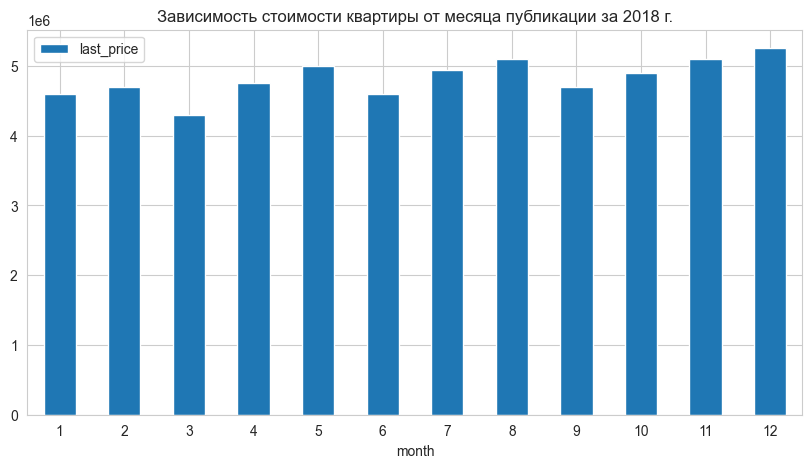

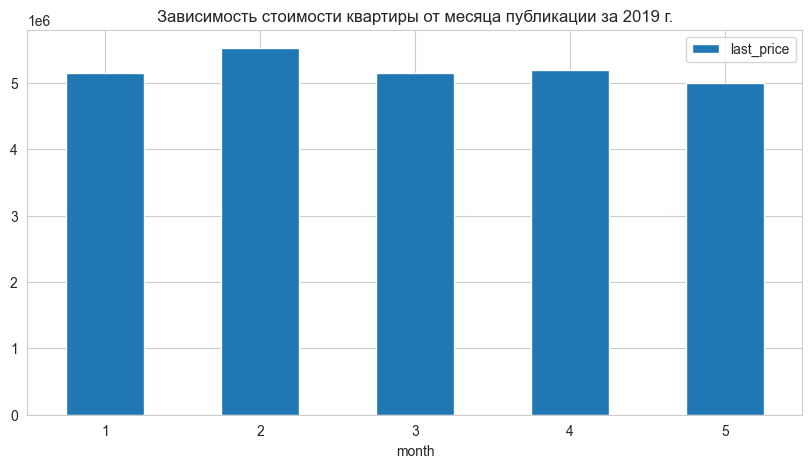

In [61]:
(
df
    .query('year == 2014')
    .pivot_table(index='month', values='last_price', aggfunc='median')
    .plot(grid='true', kind='bar', figsize=(10,5))
)

plt.title('Зависимость стоимости квартиры от месяца публикации за 2014 г.')
plt.xticks(rotation=0)
plt.show()

(
df
    .query('year == 2015')
    .pivot_table(index='month', values='last_price', aggfunc='median')
    .plot(grid='true', kind='bar', figsize=(10,5))
)

plt.title('Зависимость стоимости квартиры от месяца публикации за 2015 г.')
plt.xticks(rotation=0)
plt.show()

(
df
    .query('year == 2016')
    .pivot_table(index='month', values='last_price', aggfunc='median')
    .plot(grid='true', kind='bar', figsize=(10,5))
)

plt.title('Зависимость стоимости квартиры от месяца публикации за 2016 г.')
plt.xticks(rotation=0)
plt.show()

(
df
    .query('year == 2017')
    .pivot_table(index='month', values='last_price', aggfunc='median')
    .plot(grid='true', kind='bar', figsize=(10,5))
)

plt.title('Зависимость стоимости квартиры от месяца публикации за 2017 г.')
plt.xticks(rotation=0)
plt.show()

(
df
    .query('year == 2018')
    .pivot_table(index='month', values='last_price', aggfunc='median')
    .plot(grid='true', kind='bar', figsize=(10,5))
)

plt.title('Зависимость стоимости квартиры от месяца публикации за 2018 г.')
plt.xticks(rotation=0)
plt.show()

(
df
    .query('year == 2019')
    .pivot_table(index='month', values='last_price', aggfunc='median')
    .plot(grid='true', kind='bar', figsize=(10,5))
)

plt.title('Зависимость стоимости квартиры от месяца публикации за 2019 г.')
plt.xticks(rotation=0)
plt.show()

Стоимость недвижимости по месяцам колеблется из года в год, сезонности не наблюдается, скорее всего влияют другие факторы

Месяц публикации также почти не влияет на стоимость жилья. Есть небольшие просадки в марте и июне, но они незначительны

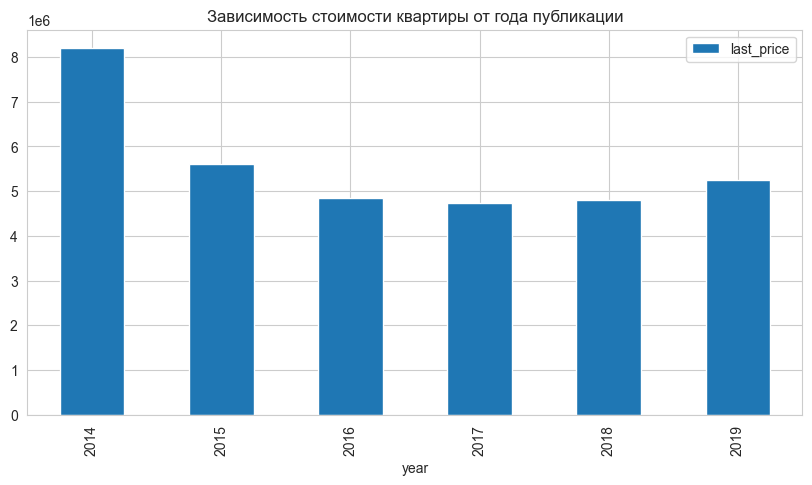

In [62]:
df.pivot_table(index='year', values='last_price', aggfunc='median').plot(grid='true', kind='bar', figsize=(10,5))
plt.title('Зависимость стоимости квартиры от года публикации')
None

На графике видно, что с 2014 года недвижимость падала в цене, и только 2018 году начала расти. Думаю это связано с общей финансовой обстановкой в стране и на рынке недвижимости

#### Средняя стоимость квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

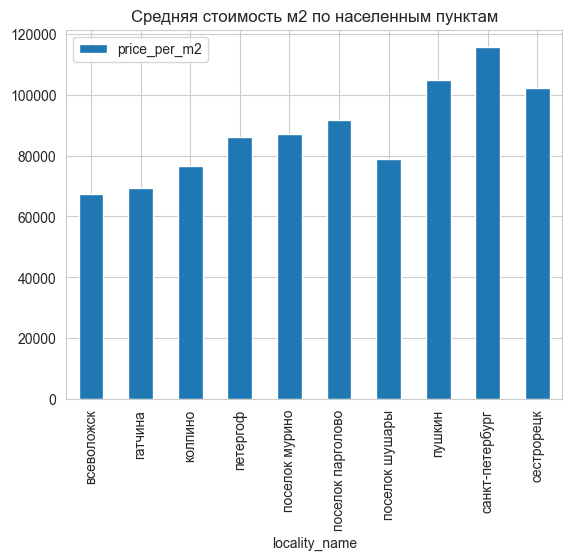

In [63]:
df_loc_top_10 = df['locality_name'].value_counts().head(10)
df_top_10 = df.where(df['locality_name'].isin(df_loc_top_10.index))
(
    df_top_10
    .pivot_table(index='locality_name', values='price_per_m2')
    .plot(kind='bar', grid=True)
)
plt.title('Средняя стоимость м2 по населенным пунктам')
None

Максимальная стоимость квадратного метра в Санкт-Петербурге, минимальная в Всеволожске

#### Зависимость стоимости объектов от расстояния до центра города

-0.2664252890867874


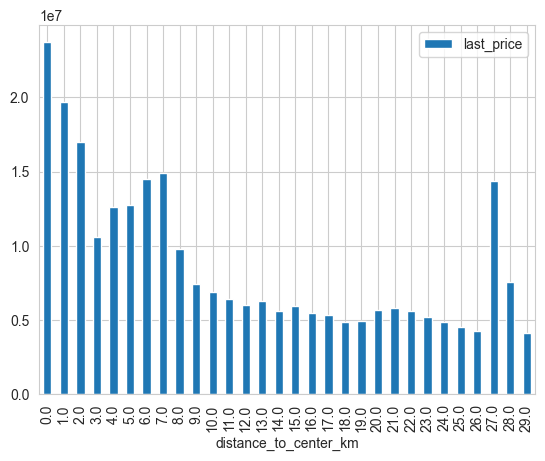

In [64]:
print(df['distance_to_center_km'].corr(df['last_price']))
(
    df.query('locality_name == "санкт-петербург"')
    .pivot_table(index='distance_to_center_km', values='last_price')
    .plot( style='o-', kind='bar')
)
None

Стоимость недвижимости ожидаемо уменьшается при отдалении от центра но есть пики на 27-28 км, скорее всего там расположен какой-то элитный поселок

### Общий вывод

**1. Пропуски и дубликаты.**  
- Во время предобработки данных было обнаружено очень много пропущенных значений, в некоторых случаях до 90% данных были пропусками. Рекомендую сделать некоторые поля (например `ceiling_height`, `is_apartment`, `balcony`) обязательными к заполнению, чтобы избежать подобных ситуаций.  

- При обработке столбца `locality_name` были обнаружены задублированные названия населенных пунктов, отличающиеся одной буквой. Предполагаю, что пользователи вручную заполняли этот параметр, предлагаю подтянуть названия населенных пунктов из одной базы, чтобы пользователь выбирал значение из списка, а не заполнял вручную
  
**2. Исследуемые параметры**
- *Общая площадь*
  - Значение общей площади в представленных квартирах в основном около 40 м2
- *Жилая площадь*
  - Значение жилой площади в основном около 20-30 м2
- *Площадь кухни*
  - Значение площади кухни в основном от 5 до 10 м2
- *Цена*
 - Стоимость большинства представленных квартир лежит в интервале 2.5 - 7.5 млн рублей
- *Количество комнат*
 - В большей части объявлений представлены одно-, двух- и трехкомнатные квартиры
- *Высота потолков*
 - В большей части объявлений представлены квартиры с высотой потолка 2.5 - 3.5 м
- *Этаж*
 - В большей части объявлений представлены квартиры, расположенные до 10 этажа
- *Тип этажа*
 - Меньше всего квартир расположено на первом этаже, чуть больше на последнем и подавляющее большинство на других этажах
- *Общее количество этажей*
 - Распределение неравномерное, но есть пики на 5 и 9, что говорит о том, что в пятиэтажных и девятиэтажных зданиях представлена немалая часть квартир
- *Расстояние до центра, аэропорта и ближайшего парка*
 - Большинство представленных квартир расположено в 10-15км от центра города.
 - Большая часть представленных квартир расположены в 10-50 км от аэропорта
 - У большинства представленных квартир в радиусе 1 км есть парк
- *День и месяц публикации объявления*
 - Чаще всего объявления публикуют в феврале, марте и апреле, самые низкие показатели в мае
 - В будние дни разницы пркатически нет, но по выходным публикаций почти в 2 раза меньше
  
**3. Скорость продажи квартир**  
- *Объявления до 10 млн*  
  
  - Обычно продажа занимает около 100 дней
  - Быстрыми являются продажи в первые 40 дней
  - Необычно долгими являются продажи более чем через 600 дней  
- *Объявления от 10 до 20 млн*  
  
  - Обычно продажа занимает около 180 дней
  - Быстрыми являются продажи в первые 75 дней
  - Необычно долгими являются продажи более чем через 900 дней  
- *Объявления от 25 до 100 млн*  
  
  - Обычно продажа занимает около 250 дней
  - Быстрыми являются продажи в первые 80 дней
  - Необычно долгими являются продажи более чем через 1100 дней  
- *Объявления от 100 млн*  
> В этом ценовом диапазоне представлено всего 12 объявлений, так что данные могут быть неточными
  - Обычно продажа занимает около 300 дней
  - Быстрыми являются продажи в первые 200 дней,
  - Необычно долгими являются продажи более чем через 500 дней 
  
**4. Влияние различных факторов на стоимость объекта**  
  
- *Общая площадь*
 - Значение коэффициента корреляции составляет 0.69. Это говорит о сильной связи между значениями общей площади квартиры и ее стоимостью  
   
- *Жилая площадь*
 - Значение коэффициента корреляции составляет 0.57, связь также присутствует, но влияение уже не такое сильное  
  
- *Площадь кухни*
 - Значение коэфффициента корреляции составляет 0.51, связь еще более слабая, это показывает, что площадь кухни не сильно влияет на стоимость объекта
- *Количесвто комнат*
 - При увеличении количества комнат, стоимость также увеличевается. Что логично, т.к. чем больше комнат, тем больше общая площадь объекта
- *Этаж*
 - Чем выше расположена квартира, тем выше ее стоимость, только если это не последний этаж, т.к. квартиры на первом и последнем этаже сильно дешевле, чем на других
 
- *День недели, месяц и год размещения*
 - Объявления опубликованные на выходных незначительно дешевле, опубликованных в будний день, непонятно с чем это связано
 - От месяца размещения стоимость квартир практически не зависит, больше влияют скорее политическое и экономическое состояние страны и рынка
 - С 2014 по 2017 годы стоимость недвижимости снизилась в 2 раза и только в 2018 году заметен небольшой рост. Падение рынка после 2014 года скорее всего связано с экономическим кризисом, настпуившим тогда
 
**5. Средняя стоимость одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений**

- Самая высокая стоимость одного квадратного метра, ожидаемо, в Санкт петербурге и составляет почти 120 000 руб./м2
- Самая низкая стоимость во Всеволожске и составляет около 70 000 руб./м2

**6. Зависимость стоимости объекта от расстояния до центра города**
 - Самые дорогие квартиры расположены в радиусе 2 км от центра города, их стоимость достигает 25 млн руб.
 - Стоимость уменьшается при удалении от центра, но есть небольшие пики на расстоянии 5-6 км от центра, скорее всего там расположены какие-либо достопримечательности или элитные районы, стоимость достигает 15 млн руб.
 - Также присутствуют пики на расстоянии 26-27 км от центра, скорее всего это какие-либо элитные ЖК и частные дома на окраине и в пригороде Санкт-Петербурга, стоимость объектов достигает 15-16 млн руб.